# Course Project

## Analyze open dataset
For my project I decided to choose FIFA 2021 Team and Player dataset,
which is available for a download on **kaggle.com** from **Batuhan Demirci**. Thanks a lot for such interesting dataset :)

In general, **FIFA 2021 Team and Player dataset** contains all players from game FIFA 2021 with names, date of birth,
anthropometric data and all information about their skills.

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [22]:
df_data = pd.read_csv("players.csv")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   int_player_id                  19002 non-null  int64  
 1   str_player_name                19002 non-null  object 
 2   str_positions                  19002 non-null  object 
 3   dt_date_of_birth               19002 non-null  object 
 4   int_height                     19002 non-null  int64  
 5   int_weight                     19002 non-null  int64  
 6   int_overall_rating             19002 non-null  int64  
 7   int_potential_rating           19002 non-null  int64  
 8   str_best_position              19002 non-null  object 
 9   int_best_overall_rating        19002 non-null  int64  
 10  int_value                      19002 non-null  int64  
 11  int_wage                       19002 non-null  int64  
 12  int_team_id                    18767 non-null 

Data contains 56 columns and 19002 observations:
- 10 with dtype object
- 45 with dtype int64
- 1 with dtype float64

Data has three columns with some empty data: int_team_id, str_player_speciality, str_trait

In [112]:
df_data.head(10)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait,float_age_years,int_wage_log,int_value_log
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",33.768323,13.235694,18.455082
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ...",36.147564,12.301387,17.958645
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,12,13,14,40,30,No speciality,"['GK Long Throw', 'Comes For Crosses']",28.226799,11.736077,18.603002
3,4,Kevin De Bruyne,"CAM, CM",1991-06-28,181,70,91,91,CAM,91,...,88,85,83,93,92,"['Dribbler', 'Playmaker\xa0', 'Engine', 'Dista...","['Injury Prone', 'Leadership', 'Early Crosser'...",29.757289,12.821261,18.675323
4,5,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,175,68,91,91,LW,91,...,95,88,89,81,95,"['Speedster', 'Dribbler', 'Playmaker\xa0', 'FK...","['Injury Prone', 'Flair', 'Speed Dribbler (AI)...",29.149474,12.506181,18.698312
5,6,Robert Lewandowski,ST,1988-08-21,184,80,91,91,ST,91,...,85,79,85,70,88,"['Distance Shooter', 'Clinical Finisher']","['Solid Player', 'Finesse Shot', 'Outside Foot...",32.607450,12.388398,18.525041
6,7,Kylian Mbappé Lottin,"ST, LW, RW",1998-12-20,178,73,90,95,ST,91,...,92,79,63,70,90,"['Speedster', 'Dribbler', 'Acrobat']","['Finesse Shot', 'Flair', 'Speed Dribbler (AI)...",22.277327,11.982935,19.038565
7,8,Alisson Ramsés Becker,GK,1992-10-02,191,91,90,91,GK,90,...,27,19,18,44,30,No speciality,"['GK Long Throw', 'Rushes Out Of Goal']",28.492376,11.982935,18.440483
8,9,Mohamed Salah Ghaly,RW,1992-06-15,175,71,90,90,RW,90,...,90,83,69,75,89,"['Speedster', 'Dribbler', 'Acrobat', 'Clinical...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",28.790808,12.429220,18.607160
9,10,Sadio Mané,LW,1992-04-10,175,69,90,90,LW,90,...,91,76,64,71,89,"['Speedster', 'Dribbler', 'Acrobat']","['Flair', 'Speed Dribbler (AI)']",28.971510,12.429220,18.607160


Initial plan for data exploration:
- drop columns with all unique values
- clean empty values from dataset
- calculate main statistics for all numeric columns (mean, variance, unique values etc.)
- transform outliers
- create correlation heatmap for numeric columns and study the most interesting relations individual
- encode significant columns with categorical variables with one-hot encoding or ordinal encoding

Empty values in columns has specific meanings:
- int_team_id - players has no club (so called "free agent"). The wage of these players == 0. Fill with 0.

In [54]:
df_data["int_team_id"].fillna(0, inplace=True)

- str_player_speciality - players has no specific role on the pitch. Fill with "No speciality".

In [55]:
df_data["str_player_speciality"].fillna("No speciality", inplace=True)

- str_trait - players has no unusual traits. Fill empty values with "No traits".

In [56]:
df_data["str_trait"].fillna("No traits", inplace=True)


<AxesSubplot:>

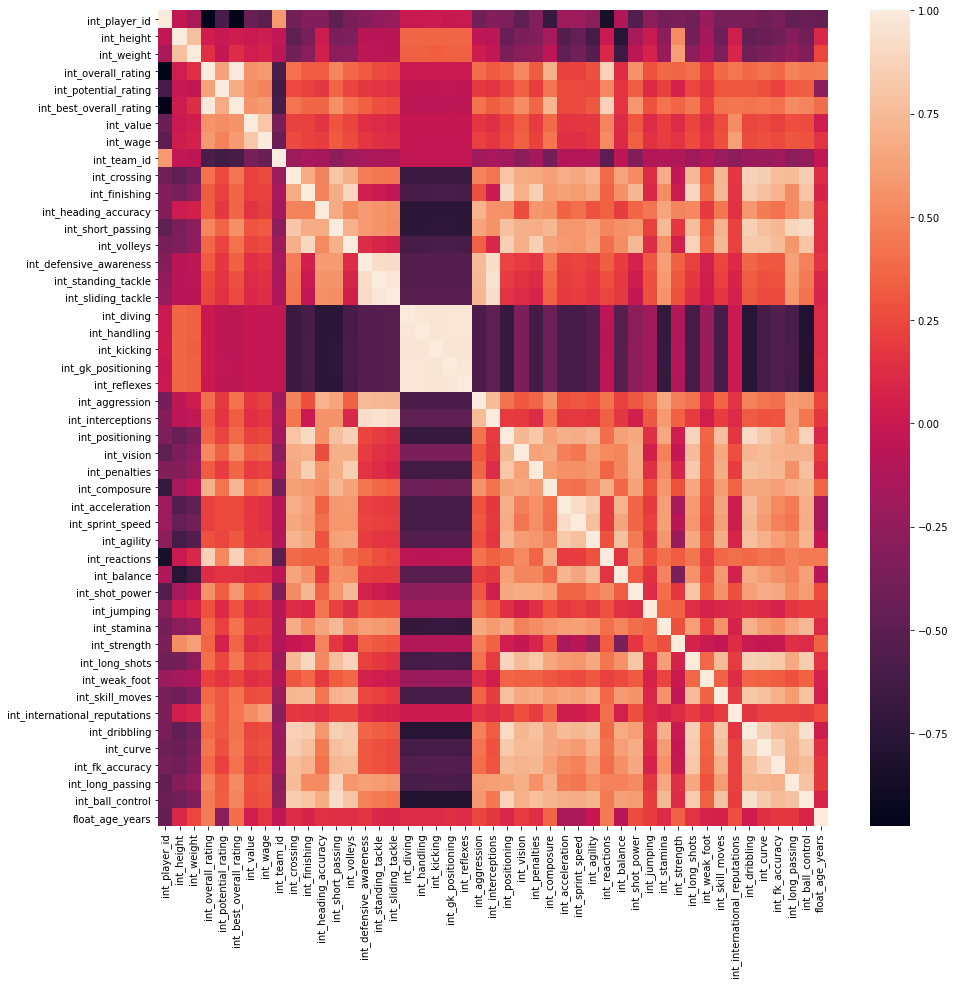

In [81]:
fig, ax = plt.subplots(figsize=(15,15))
correlation = df_data.corr()
sns.heatmap(correlation, color="green")

In [113]:
df_data.describe()

,int_player_id,int_height,int_weight,int_overall_rating,int_potential_rating,int_best_overall_rating,int_value,int_wage,int_team_id,int_crossing,...,int_skill_moves,int_international_reputations,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,float_age_years,int_wage_log,int_value_log
count,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,1.900200e+04,19002.000000,19002.000000,19002.000000,...,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,18756.000000,18746.000000
mean,9501.500000,181.225660,75.046311,65.754868,71.148932,66.784286,2.891449e+06,9113.167035,328.541101,49.690454,...,2.365540,1.090569,55.607462,47.271603,42.394432,52.779971,58.552416,26.395263,8.126509,13.892599
std,5485.549243,6.847472,7.078378,6.948835,6.115352,6.733926,7.733189e+06,19735.324238,198.629217,18.141514,...,0.766687,0.359019,18.786894,18.217325,17.240399,15.172601,16.580120,4.702246,1.354744,1.244349
min,1.000000,155.000000,50.000000,47.000000,48.000000,48.000000,0.000000e+00,0.000000,0.000000,6.000000,...,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,17.444921,6.216606,9.105091
25%,4751.250000,176.000000,70.000000,61.000000,67.000000,62.000000,4.750000e+05,1000.000000,155.000000,38.000000,...,2.000000,1.000000,49.000000,35.000000,31.000000,43.000000,54.000000,22.592871,6.908755,13.071072
50%,9501.500000,181.000000,75.000000,66.000000,71.000000,67.000000,9.500000e+05,3000.000000,326.000000,54.000000,...,2.000000,1.000000,61.000000,49.000000,41.000000,56.000000,63.000000,25.965288,8.006701,13.790194
75%,14251.750000,186.000000,80.000000,70.000000,75.000000,71.000000,2.000000e+06,8000.000000,500.000000,63.000000,...,3.000000,1.000000,68.000000,61.000000,55.000000,64.000000,69.000000,29.754551,9.105091,14.508658
max,19002.000000,206.000000,110.000000,93.000000,95.000000,93.000000,1.855000e+08,560000.000000,681.000000,94.000000,...,5.000000,5.000000,96.000000,94.000000,94.000000,93.000000,96.000000,54.091806,13.235694,19.038565


Actions taken for feature engineering:
- Calculate age of footballers from **dt_date_of_birth**.
- Calculate an anthropometric coefficient of weight/height.
- One-hot encoding for preferred foot.
- Ordinal encoding for best_position, body_type, nationality.
- Log transformation for wage and value of players

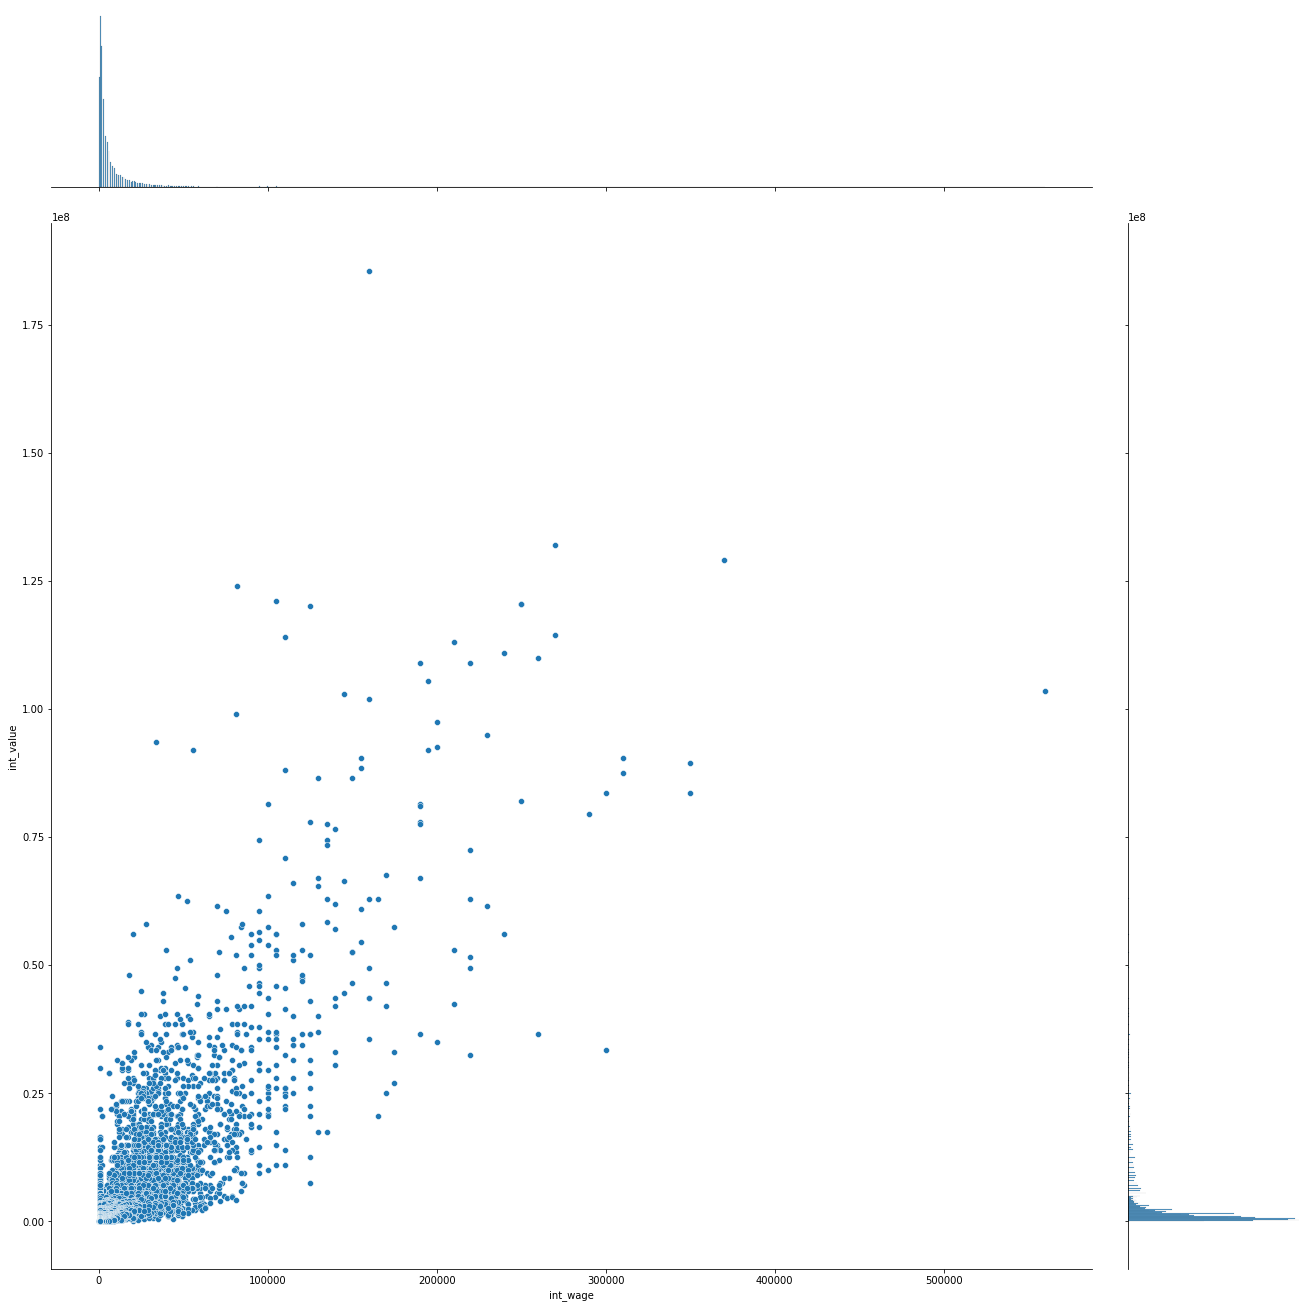

In [93]:
sns.jointplot(data=df_data, x="int_wage", y="int_value", height=18.27)


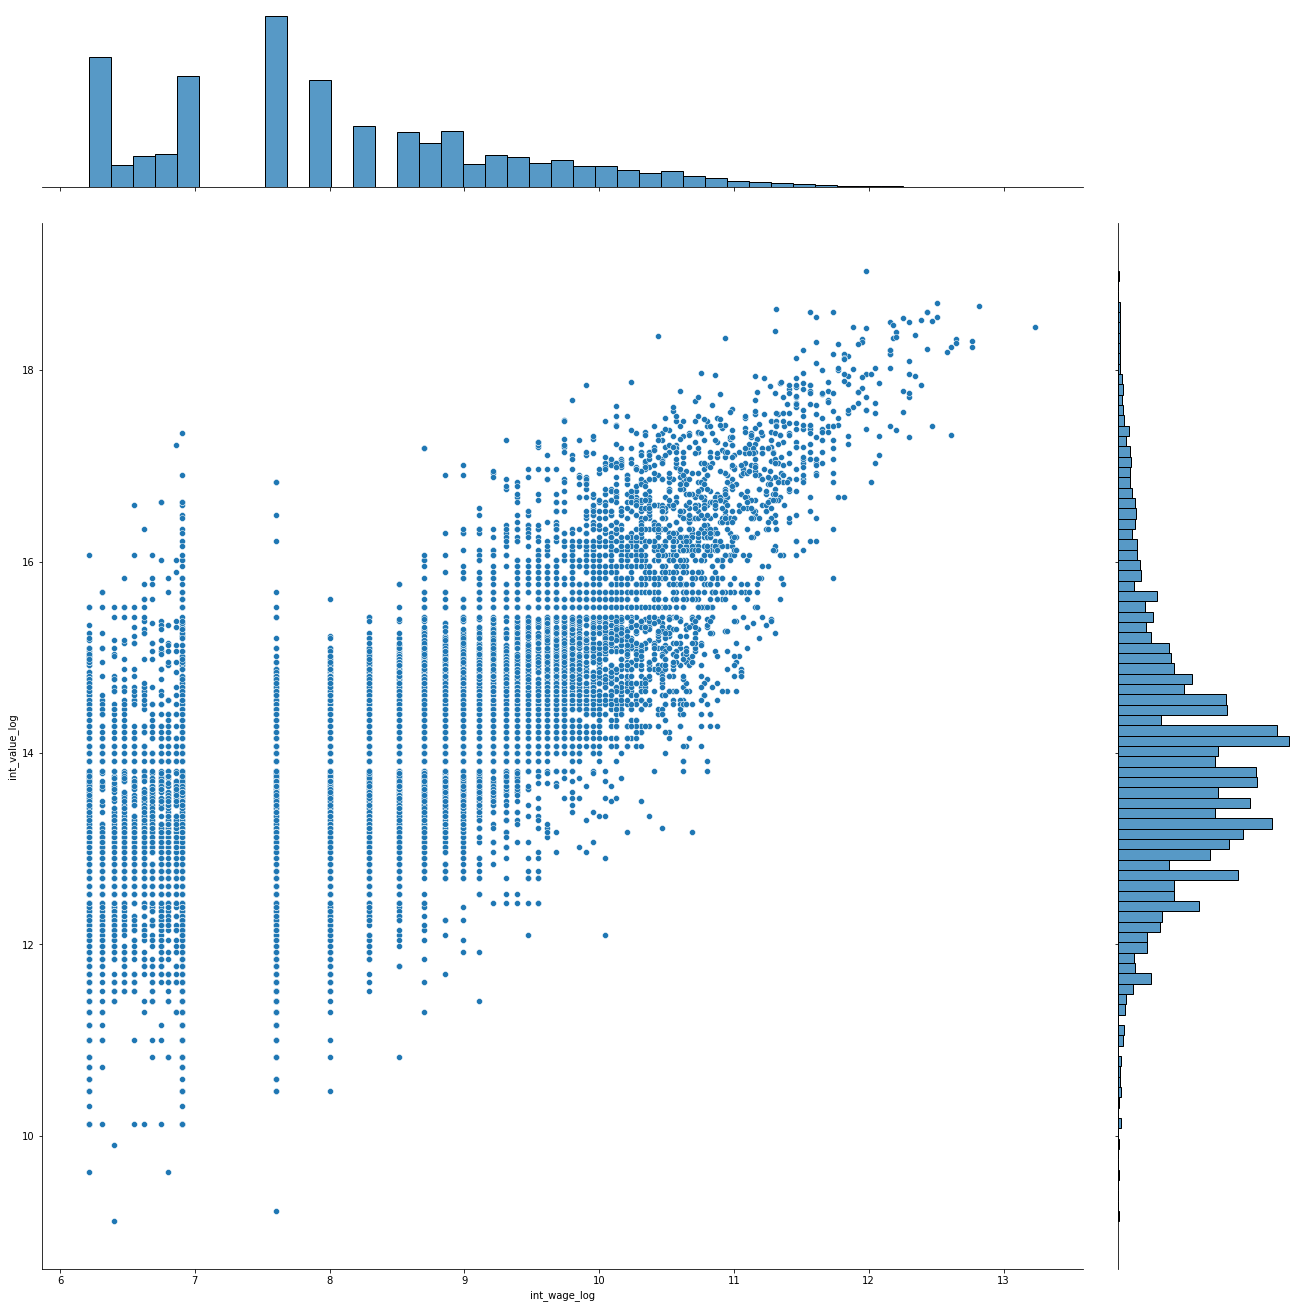

In [111]:
df_data["int_wage_log"] = np.log1p(df_data.loc[df_data["int_wage"] > 0, "int_wage"])
df_data["int_value_log"] = np.log1p(df_data.loc[df_data["int_value"] > 0, "int_value"])
sns.jointplot(data=df_data, x="int_wage_log", y="int_value_log", height=18.27)



Key Findings and Insights:
- the older a football player, the less his potential rating, sprint_speed and acceleration.
- players with the larger wage and value has the most value of international reputations.
- 80% of top overall rating players has right preferred foot.
- the more anthropomorphic coefficient, the more stamina and strength and the less balance.
- players with the most value of ball control has the most values of short passing, finishing, crossing.

Hypothesis:
- Ho: heading accuracy of players not depend on height of players
- Ha: heading accuracy of players depend on height of players

- Ho: there is no difference in a means of shooting of ST and RW players
- Ha: there is a difference in a means of shooting of ST and RW players

- Ho: overall rating of players not depend on age of players
- Ha: overall rating of players depend on age of players

For test we choose a hypothesis №1:
- Ho: overall rating of players not depend on age of players
- Ha: overall rating of players depend on age of players

Confidence level has been set to 95% (α == 0.05).
Pearson correlation coefficient - 0.013, p-value - 0.078 (using **stats.pearsonr**).
The P-value is more than significance level of 0.05, and we will accept Ho. 

In conclusion, the quality of the data at a good level, there are practically no empty data, and their complete description of the problems is satisfactory.

